In [1]:
# Import relevant libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('../input/advertising/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
# Data contains a list of users on a particular website. Data tracks if the potential customer clicked on an ad or not and contains various features of these potential customers.
# Features include daily time spent on site, age, income, sex, country, time of usage, etc.
# Goal is to use this data to predict if a potential user on this website will click an ad or not.
# While other models such as SVM, random forest, XGBoost, etc. can be used for this classification problem, linear regression was used for demonstration.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
# Check for missing values
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## Exploratory Data Analysis

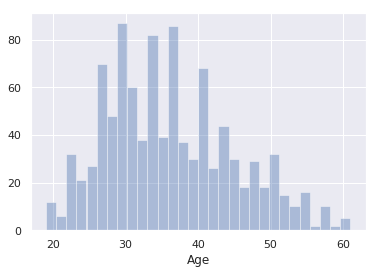

In [7]:
sns.distplot(df['Age'], kde=False, bins=30)
plt.show()

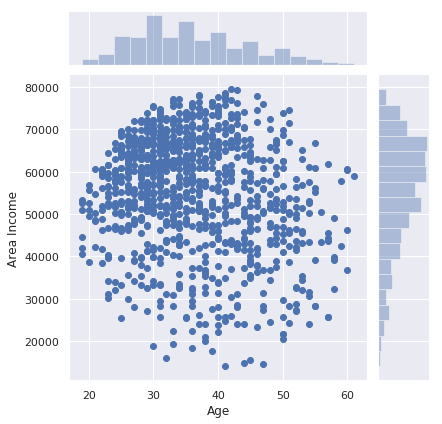

In [8]:
sns.jointplot(x='Age', y='Area Income', data=df)
plt.show()

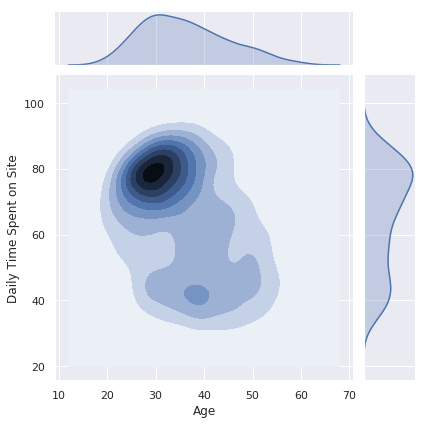

In [9]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, kind='kde')
plt.show()

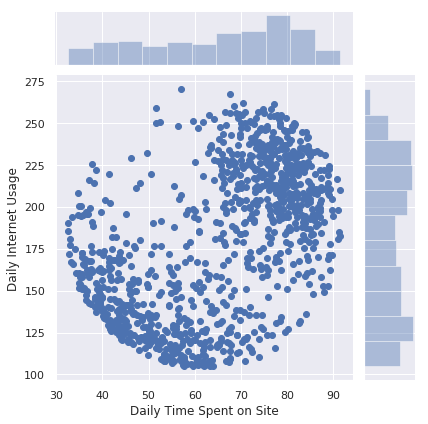

In [10]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df)
plt.show()

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


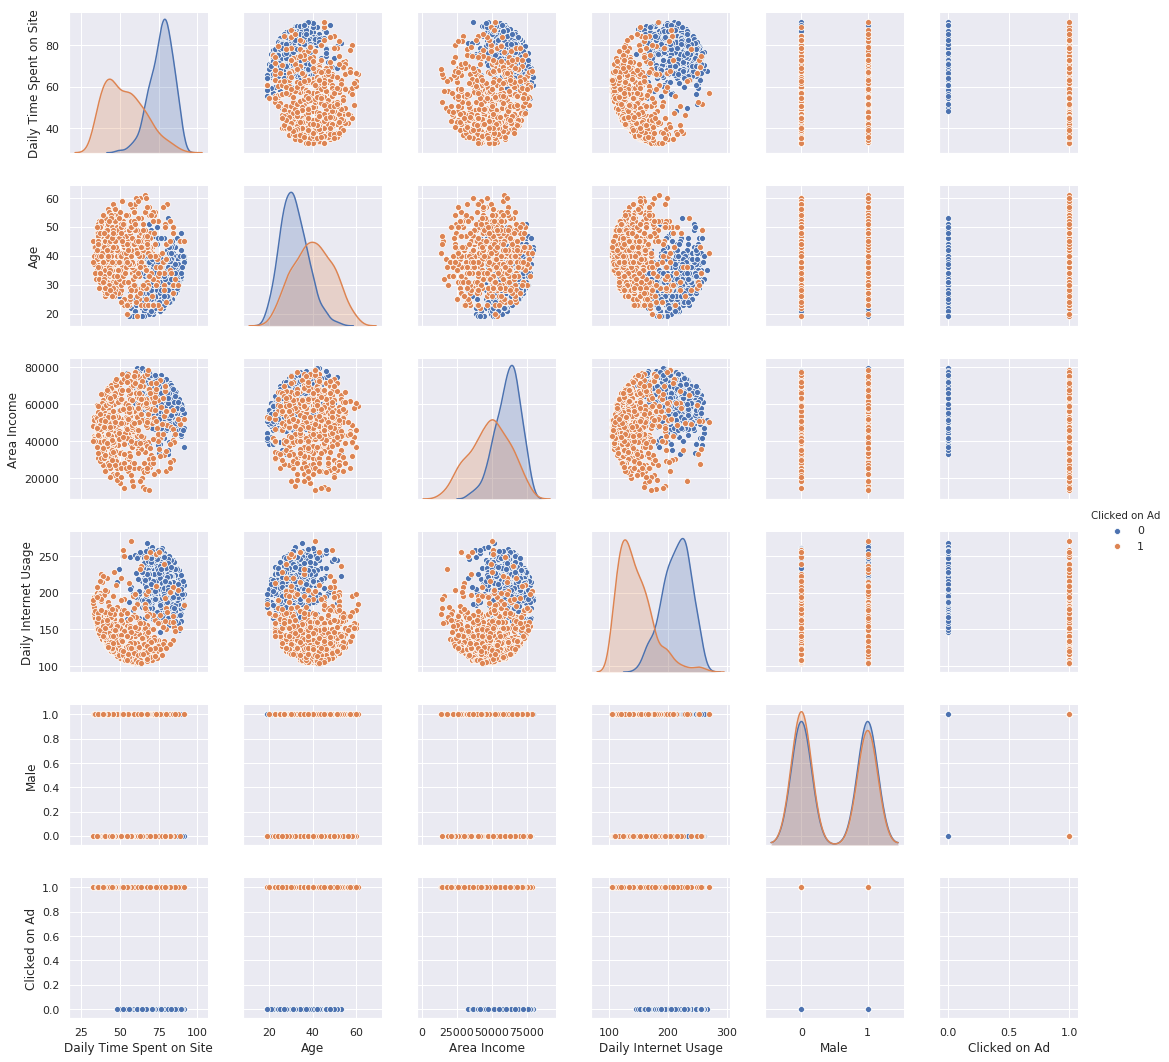

In [11]:
sns.pairplot(df, hue='Clicked on Ad')
plt.show()

## Feature Selection

In [12]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [13]:
df.shape

(1000, 10)

In [14]:
# Convert values under 'Timestamp' from str to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [15]:
df['Timestamp'][0]

Timestamp('2016-03-27 00:53:11')

In [16]:
# Creating new columns for 'Month', 'Day of Week', and 'Hour' from information in 'Timestamp' after converting to a datetime
df['Month'] = df['Timestamp'].apply(lambda t:t.month)
df['Day of Week'] = df['Timestamp'].apply(lambda t:t.dayofweek)
df['Hour'] = df['Timestamp'].apply(lambda t:t.hour)

In [17]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Month,Day of Week,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6,4,3


In [18]:
# Will convert to dummy variables
print(df['Country'].nunique())

# Nearly all rows in this column are unique. Best to drop entire column prior to fitting the model.
print(df['City'].nunique())

# Each row in this column is unique. Best to drop entire column prior to fitting the model.
print(df['Ad Topic Line'].nunique())

# Each row in this column is unique. Best to drop entire column prior to fitting the model.
print(df['Ad Topic Line'].nunique())

237
969
1000
1000


In [19]:
# Dropping colunms that will be excluded
df.drop(['Ad Topic Line', 'City', 'Timestamp'], axis=1, inplace=True)

In [20]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad,Month,Day of Week,Hour
0,68.95,35,61833.90,256.09,0,Tunisia,0,3,6,0
1,80.23,31,68441.85,193.77,1,Nauru,0,4,0,1
2,69.47,26,59785.94,236.50,0,San Marino,0,3,6,20
3,74.15,29,54806.18,245.89,1,Italy,0,1,6,2
4,68.37,35,73889.99,225.58,0,Iceland,0,6,4,3


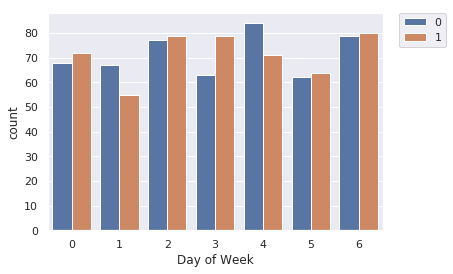

In [21]:
# Further exploratory data analysis with respect to time

sns.countplot(x='Day of Week', hue='Clicked on Ad', data=df)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.show()

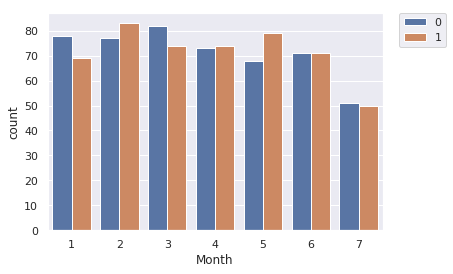

In [22]:
sns.countplot(x='Month', hue='Clicked on Ad', data=df)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.show()

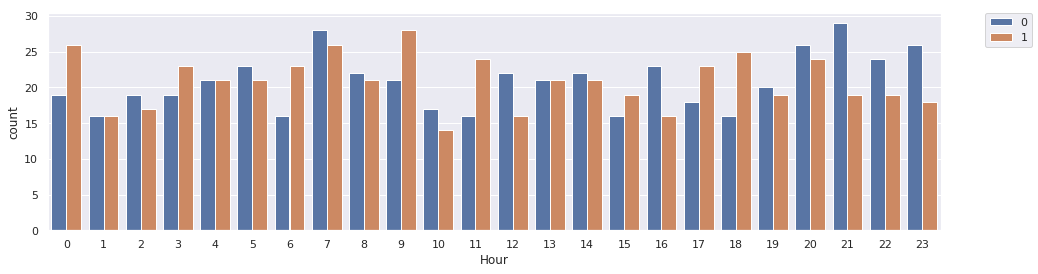

In [23]:
plt.figure(figsize=(16,4))
sns.countplot(x='Hour', hue='Clicked on Ad', data=df)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.show()

In [24]:
# Converting countries into dummy variables and dropping the first column. One Hot Encoding is also viable.
country = pd.get_dummies(df['Country'], drop_first=True)
country.shape

(1000, 236)

In [25]:
X = pd.concat([df, country], axis=1)
X.drop(['Country', 'Clicked on Ad'], axis=1, inplace=True)
y = df['Clicked on Ad']

In [26]:
# Generating training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
print(X_train.shape)
print(X_test.shape)

(700, 244)
(300, 244)


In [28]:
# Importing model from sci-kit learn and fitting model with training data
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Predicitions based on model
y_pred = logmodel.predict(X_test)

In [30]:
# Model performance evaluation
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[157   7]
 [ 16 120]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       164
           1       0.94      0.88      0.91       136

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

